In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from imblearn.over_sampling import SMOTE

from catboost import CatBoostRegressor


invertebrate_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_dataset.csv" )
eval_eval = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Invertebrate/Invertebrate_new_test_data.csv')


In [3]:
invertebrate_data.describe()

SWI         SWF  temperature        size  management    duration
count  280.000000  280.000000   280.000000  280.000000  280.000000  280.000000
mean     1.896714    1.480679    16.372500   41.138214    4.082143   31.307143
std      0.610995    0.476403     3.619312   19.434496    2.520959    4.198304
min      0.480000    0.250000     3.500000    0.500000    0.000000   19.000000
25%      1.507500    1.190000    14.100000   27.275000    2.000000   29.000000
50%      1.825000    1.495000    17.050000   41.100000    4.000000   32.000000
75%      2.282500    1.790000    19.125000   54.725000    6.000000   34.000000
max      3.790000    2.840000    21.600000   94.200000    8.000000   41.000000

In [4]:
invertebrate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SWI          280 non-null    float64
 1   SWF          280 non-null    float64
 2   temperature  280 non-null    float64
 3   size         280 non-null    float64
 4   management   280 non-null    int64  
 5   duration     280 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 13.2 KB


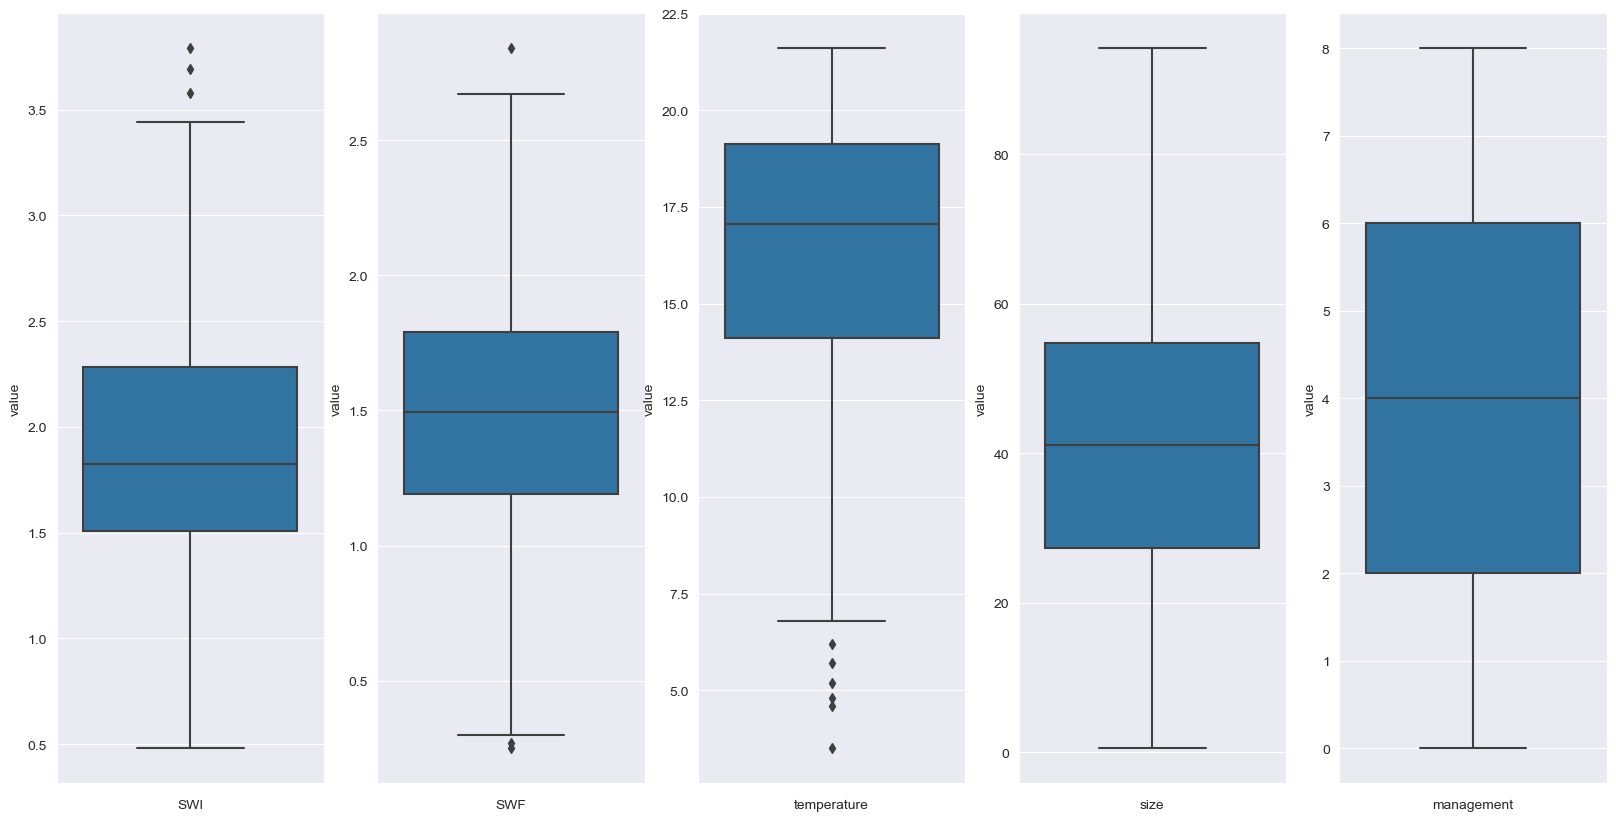

In [5]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))

for col, figIndx in zip(invertebrate_data.columns, ax.flatten()):
    sns.boxplot(y = invertebrate_data[col], ax = figIndx).set(ylabel="value", xlabel = col)

In [6]:
for col in invertebrate_data.columns:
    print(col + " -----------------")
    valueCnts = invertebrate_data[col].value_counts()
    sums = valueCnts.sum()
    for indx, entry in enumerate(valueCnts):
        print(str(indx) + ": " + str((entry/sums)*100) + "%")

SWI -----------------
0: 1.7857142857142856%
1: 1.7857142857142856%
2: 1.4285714285714286%
3: 1.4285714285714286%
4: 1.4285714285714286%
5: 1.4285714285714286%
6: 1.4285714285714286%
7: 1.4285714285714286%
8: 1.4285714285714286%
9: 1.4285714285714286%
10: 1.4285714285714286%
11: 1.4285714285714286%
12: 1.4285714285714286%
13: 1.4285714285714286%
14: 1.0714285714285714%
15: 1.0714285714285714%
16: 1.0714285714285714%
17: 1.0714285714285714%
18: 1.0714285714285714%
19: 1.0714285714285714%
20: 1.0714285714285714%
21: 1.0714285714285714%
22: 1.0714285714285714%
23: 1.0714285714285714%
24: 1.0714285714285714%
25: 1.0714285714285714%
26: 1.0714285714285714%
27: 1.0714285714285714%
28: 1.0714285714285714%
29: 1.0714285714285714%
30: 1.0714285714285714%
31: 1.0714285714285714%
32: 1.0714285714285714%
33: 0.7142857142857143%
34: 0.7142857142857143%
35: 0.7142857142857143%
36: 0.7142857142857143%
37: 0.7142857142857143%
38: 0.7142857142857143%
39: 0.7142857142857143%
40: 0.7142857142857143%
41: 

In [7]:
#EDA

In [8]:
#NORM AND SCALE AND DUMMIES

In [11]:
y = invertebrate_data.SWI
x = invertebrate_data[invertebrate_data.columns[invertebrate_data.columns != "SWI"]]

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SWF          280 non-null    float64
 1   temperature  280 non-null    float64
 2   size         280 non-null    float64
 3   management   280 non-null    int64  
 4   duration     280 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 11.1 KB


In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [14]:
model = CatBoostRegressor()

In [15]:
model.fit(xtrain, ytrain)

Learning rate set to 0.031649
0:	learn: 0.6140787	total: 148ms	remaining: 2m 27s
1:	learn: 0.6076620	total: 149ms	remaining: 1m 14s
2:	learn: 0.6009461	total: 149ms	remaining: 49.6s
3:	learn: 0.5941003	total: 150ms	remaining: 37.3s
4:	learn: 0.5861064	total: 150ms	remaining: 29.8s
5:	learn: 0.5788293	total: 150ms	remaining: 24.9s
6:	learn: 0.5712886	total: 151ms	remaining: 21.4s
7:	learn: 0.5640731	total: 152ms	remaining: 18.8s
8:	learn: 0.5576272	total: 152ms	remaining: 16.7s
9:	learn: 0.5509221	total: 152ms	remaining: 15.1s
10:	learn: 0.5446865	total: 153ms	remaining: 13.7s
11:	learn: 0.5394667	total: 153ms	remaining: 12.6s
12:	learn: 0.5333781	total: 154ms	remaining: 11.7s
13:	learn: 0.5293386	total: 154ms	remaining: 10.9s
14:	learn: 0.5244463	total: 155ms	remaining: 10.2s
15:	learn: 0.5189315	total: 155ms	remaining: 9.55s
16:	learn: 0.5132673	total: 156ms	remaining: 9.01s
17:	learn: 0.5086326	total: 156ms	remaining: 8.53s
18:	learn: 0.5027491	total: 157ms	remaining: 8.1s
19:	learn:

In [17]:
yPred1 = model.predict(xtest)
print(r2_score(ytest, yPred1))
print(mean_squared_error(ytest, yPred1))

0.5081718921849807
0.16303674491428874


In [18]:
params = {'depth'         : [4,5,6,7,8,9, 10],
          'learning_rate' : [0.01,0.02,0.03,0.04],
          'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
          }

In [19]:
grid = GridSearchCV(model, params, cv = 4, verbose=1)
grid.fit(xtrain, ytrain)

Fitting 4 folds for each of 280 candidates, totalling 1120 fits
0:	learn: 0.6315218	total: 397us	remaining: 3.58ms
1:	learn: 0.6292159	total: 700us	remaining: 2.8ms
2:	learn: 0.6269351	total: 983us	remaining: 2.29ms
3:	learn: 0.6242638	total: 1.25ms	remaining: 1.87ms
4:	learn: 0.6219128	total: 1.52ms	remaining: 1.52ms
5:	learn: 0.6196640	total: 1.77ms	remaining: 1.18ms
6:	learn: 0.6174545	total: 2.02ms	remaining: 863us
7:	learn: 0.6155607	total: 2.3ms	remaining: 574us
8:	learn: 0.6137429	total: 2.55ms	remaining: 283us
9:	learn: 0.6117564	total: 2.82ms	remaining: 0us
0:	learn: 0.6006109	total: 367us	remaining: 3.31ms
1:	learn: 0.5982395	total: 651us	remaining: 2.61ms
2:	learn: 0.5958603	total: 920us	remaining: 2.15ms
3:	learn: 0.5932702	total: 1.17ms	remaining: 1.75ms
4:	learn: 0.5914178	total: 1.42ms	remaining: 1.42ms
5:	learn: 0.5891317	total: 1.68ms	remaining: 1.12ms
6:	learn: 0.5865340	total: 1.93ms	remaining: 825us
7:	learn: 0.5838620	total: 2.16ms	remaining: 540us
8:	learn: 0.5816

GridSearchCV(cv=4,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001DACB08A9A0>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             verbose=1)

In [20]:
grid.best_params_

{'depth': 4, 'iterations': 100, 'learning_rate': 0.04}

In [21]:
grid.best_estimator_

In [22]:
grid.best_score_

0.5377930506443974

In [26]:
model2 = CatBoostRegressor(depth=4, iterations = 100, learning_rate=0.04)

In [27]:
from sklearn.model_selection import cross_val_score

model2.fit(xtrain, ytrain)
cv_scores = cross_val_score(model, xtrain, ytrain, cv=5)


0:	learn: 0.6116865	total: 433us	remaining: 42.9ms
1:	learn: 0.6029777	total: 872us	remaining: 42.8ms
2:	learn: 0.5961504	total: 1.14ms	remaining: 37ms
3:	learn: 0.5876705	total: 1.41ms	remaining: 33.9ms
4:	learn: 0.5796994	total: 1.68ms	remaining: 31.8ms
5:	learn: 0.5712021	total: 1.95ms	remaining: 30.5ms
6:	learn: 0.5629872	total: 2.2ms	remaining: 29.3ms
7:	learn: 0.5553867	total: 2.45ms	remaining: 28.2ms
8:	learn: 0.5485918	total: 2.72ms	remaining: 27.5ms
9:	learn: 0.5412319	total: 2.97ms	remaining: 26.8ms
10:	learn: 0.5350838	total: 3.23ms	remaining: 26.1ms
11:	learn: 0.5286110	total: 3.5ms	remaining: 25.6ms
12:	learn: 0.5232866	total: 3.76ms	remaining: 25.1ms
13:	learn: 0.5185558	total: 3.96ms	remaining: 24.3ms
14:	learn: 0.5123371	total: 4.22ms	remaining: 23.9ms
15:	learn: 0.5063560	total: 4.49ms	remaining: 23.6ms
16:	learn: 0.4998466	total: 4.75ms	remaining: 23.2ms
17:	learn: 0.4935080	total: 5.01ms	remaining: 22.8ms
18:	learn: 0.4885329	total: 5.27ms	remaining: 22.5ms
19:	learn

In [28]:
yPred2 = model2.predict(xtest)
print(r2_score(ytest, yPred2))
print(mean_squared_error(ytest, yPred2))

0.5885936715330811
0.1363776237359992


In [30]:
eval_eval

SWF  temperature  size  management  duration
0    0.86         21.6  21.6           5        32
1    1.30         21.6  23.7           4        35
2    1.79         21.7  32.9           3        39
3    1.92         21.8  47.5           7        34
4    0.90         21.8  42.8           6        35
..    ...          ...   ...         ...       ...
115  1.30         30.7  23.4           1        30
116  1.16         31.9  35.3           7        25
117  1.03         32.4  49.4           4        26
118  2.15         33.1  48.0           2        23
119  1.86         33.6  61.4           5        21

[120 rows x 5 columns]

In [32]:
preds = model.predict(eval_eval)
preds = pd.DataFrame(preds)
preds.to_csv('C:\\Users\\edwin\\Documents\\Code\\InvertabraePred1.csv', index=False)
